# Predicting the percentage of a Student based on the number of Study Hours
## By (Passant Hamdi)

In this project we will use linear regression to predict a student grades based on the number of hours he studied.
It involves only two variables.

In [1]:
# Let's import our important libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Exploring the data

In [2]:
# Extracting the data from URL
url = 'http://bit.ly/w-data'
df = pd.read_csv(url)

In [3]:
# Now Let's view our data
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#Let's make sure that we don't have null data
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

Yes! our data is clean

Here we will plot our data to see if we can dedict the relationship between the two vriables.

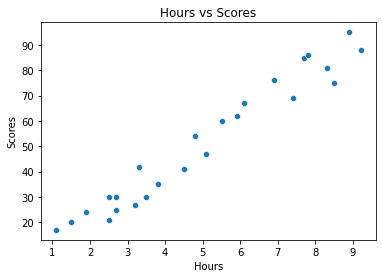

In [5]:
sns.scatterplot(x = 'Hours', y = 'Scores', data = df)
plt.title('Hours vs Scores');

We can see that there is a positive linear relationship between students' study hours and there scores.

## preparing the Data

In [6]:
# Let's split our data into inputs and outputs
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

Then we are going to split the data into training data and testing data by using Scikit-Learn's built-in train_test_split() method.

In [7]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [8]:
#Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 20 samples.
Testing set has 5 samples.


## Implementing the model

For our linear regression model, we'll be using scikit-learn's LinearRegression class. This class provides the function fit() to fit the model to our data.

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Now we have trained our model!

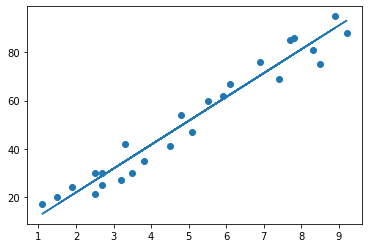

In [10]:
# Let's Plotthe regression line
line = model.coef_*X+model.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);

Here we have fitted the line to our data.

In [11]:
# Now let's predict student's scores.
y_pred = model.predict(X_test)

print(X_test, y_pred)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]] [16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


The results above shows that student's scores increase with the studying hours.

## Testing The Model

In [12]:
# let's compare between the actual and predicted scores.
Y = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
Y 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [13]:
# Here we will predict the score for specific studying hours.
study_hours = 9.25
sc_pred = model.predict([[study_hours]])
print("No of Hours = {}".format(study_hours))
print("Predicted Score = {}".format(sc_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


## Evaluating The Model

Now we have reached our final step in the project. We are going to evalute our regression model using r2 method.

In [14]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

0.9454906892105354


The normal case is when the R2 score is between zero and one.  0.95 means our model is capable to explain 95 per cent of the variance of data.